## Use Case - Klassifikation der Herkunft von Automodellen anhand ausgewählter Features
Die Klassifikation ist eine Methode zur Vorhersage von kategorischen Daten und kann vielseitig eingesetzt werden. In diesem Beispiel geht es um die Vorhersage von Herkunftsländern anhand bestimmter Automerkmale. Wie Sie in der Vorschau gesehen haben lässt die Performance etwas zu wünschen übrig. Vielleicht können wir diese verbessern, indem wir die Klassen Japan und Europe zusammenlegen und nur non-usa, usa klassifizieren.

In [12]:
#import 
import pandas as pd
import seaborn as sns
import missingno as msno
import plotly.express as px

In [13]:
#Dataset laden und transformieren
mpg = sns.load_dataset('mpg')
mpg.origin = mpg.origin.map({'japan':'non-usa','europe':'non-usa','usa':'usa'})

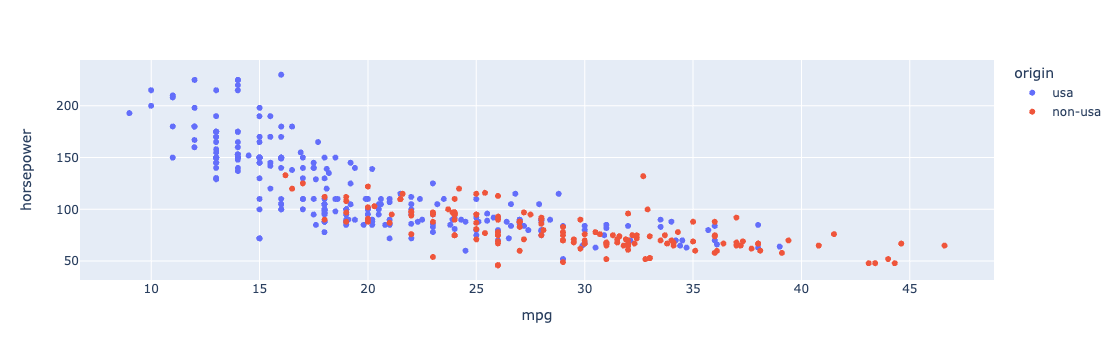

In [14]:
px.scatter(mpg, x='mpg', y='horsepower',color='origin')

Das Problem Mehrklassen Problem ist nun in ein zwei-Klassen Problem umgewandelt worden und erzielt womöglich eine bessere Performance.

Wie Sie im folgenden sehen haben wir immer noch Fehlwerte in unserem Feature horsepower. Können Sie diese mit einem Simple Imputer ersetzen?

<Axes: >

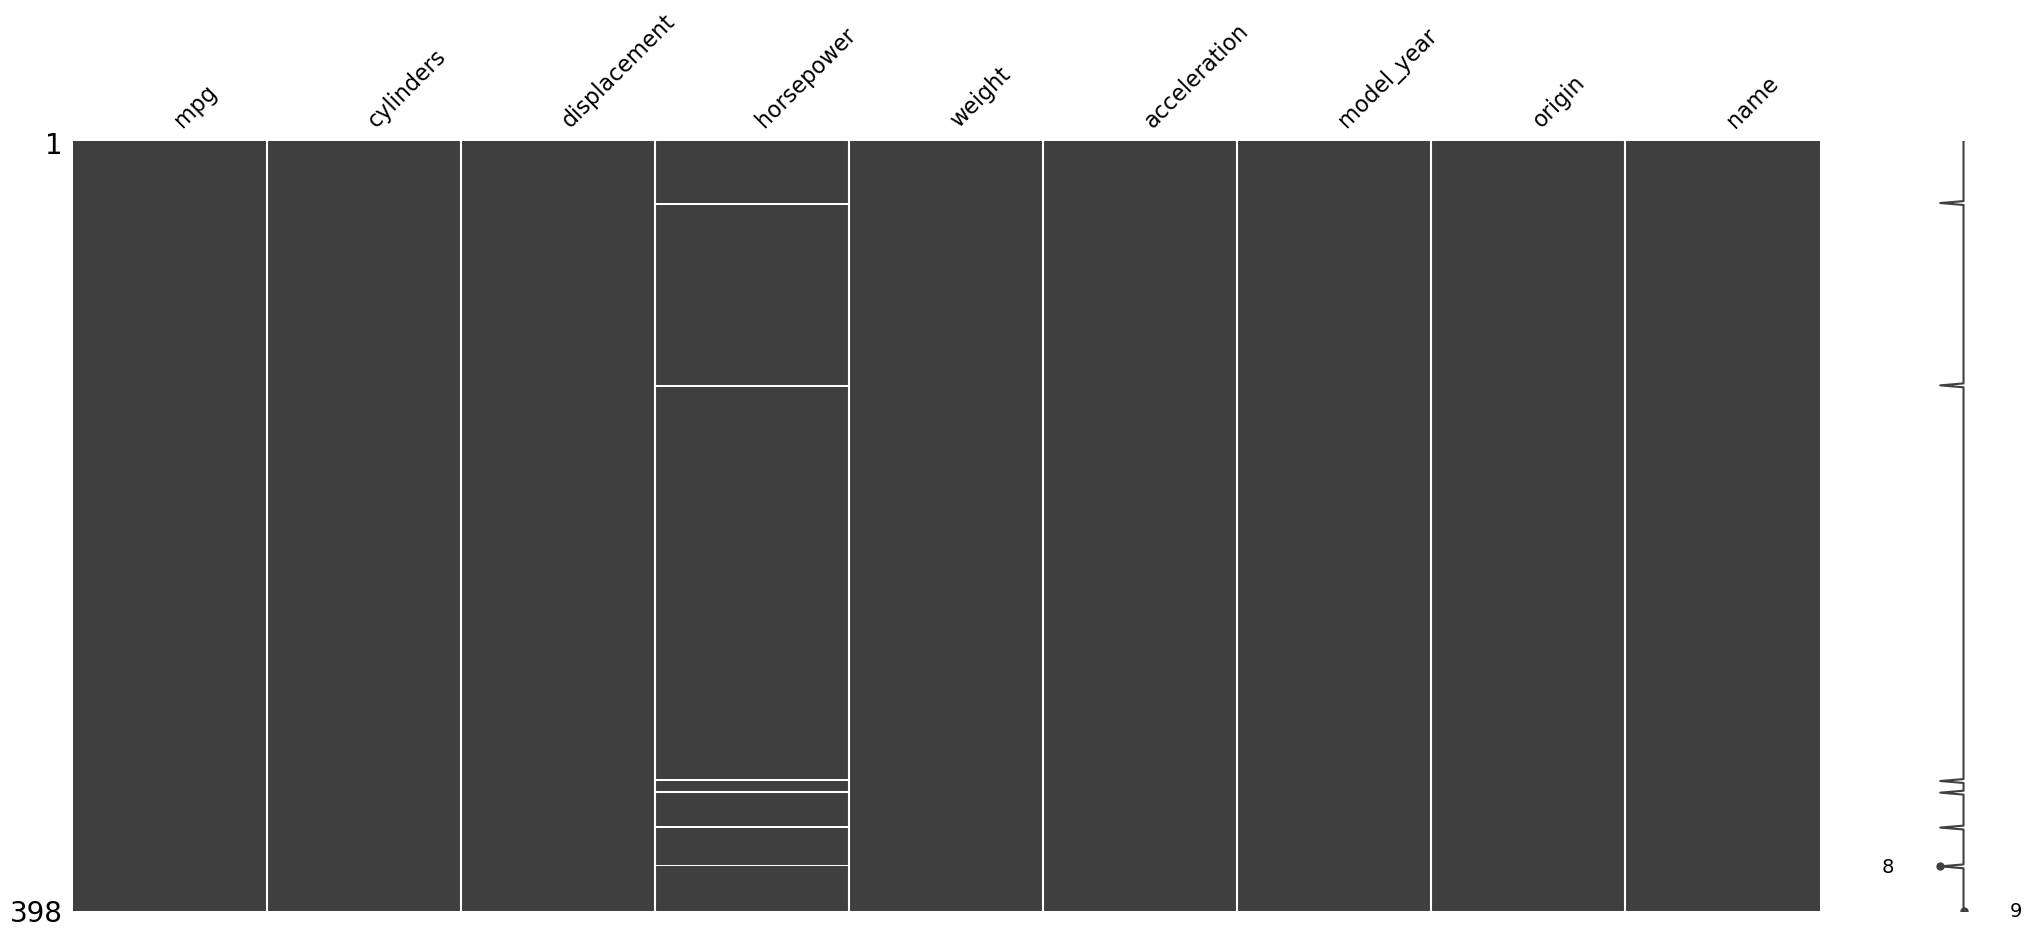

In [15]:
msno.matrix(mpg)

In [16]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
horsepower = mpg[['horsepower']]
mpg.horsepower = imputer.fit_transform(horsepower)

/Users/kaslibekir/ENTER/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/kaslibekir/ENTER/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/kaslibekir/ENTER/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/kaslibekir/ENTER/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/kaslibekir/ENTER/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecate

<Axes: >

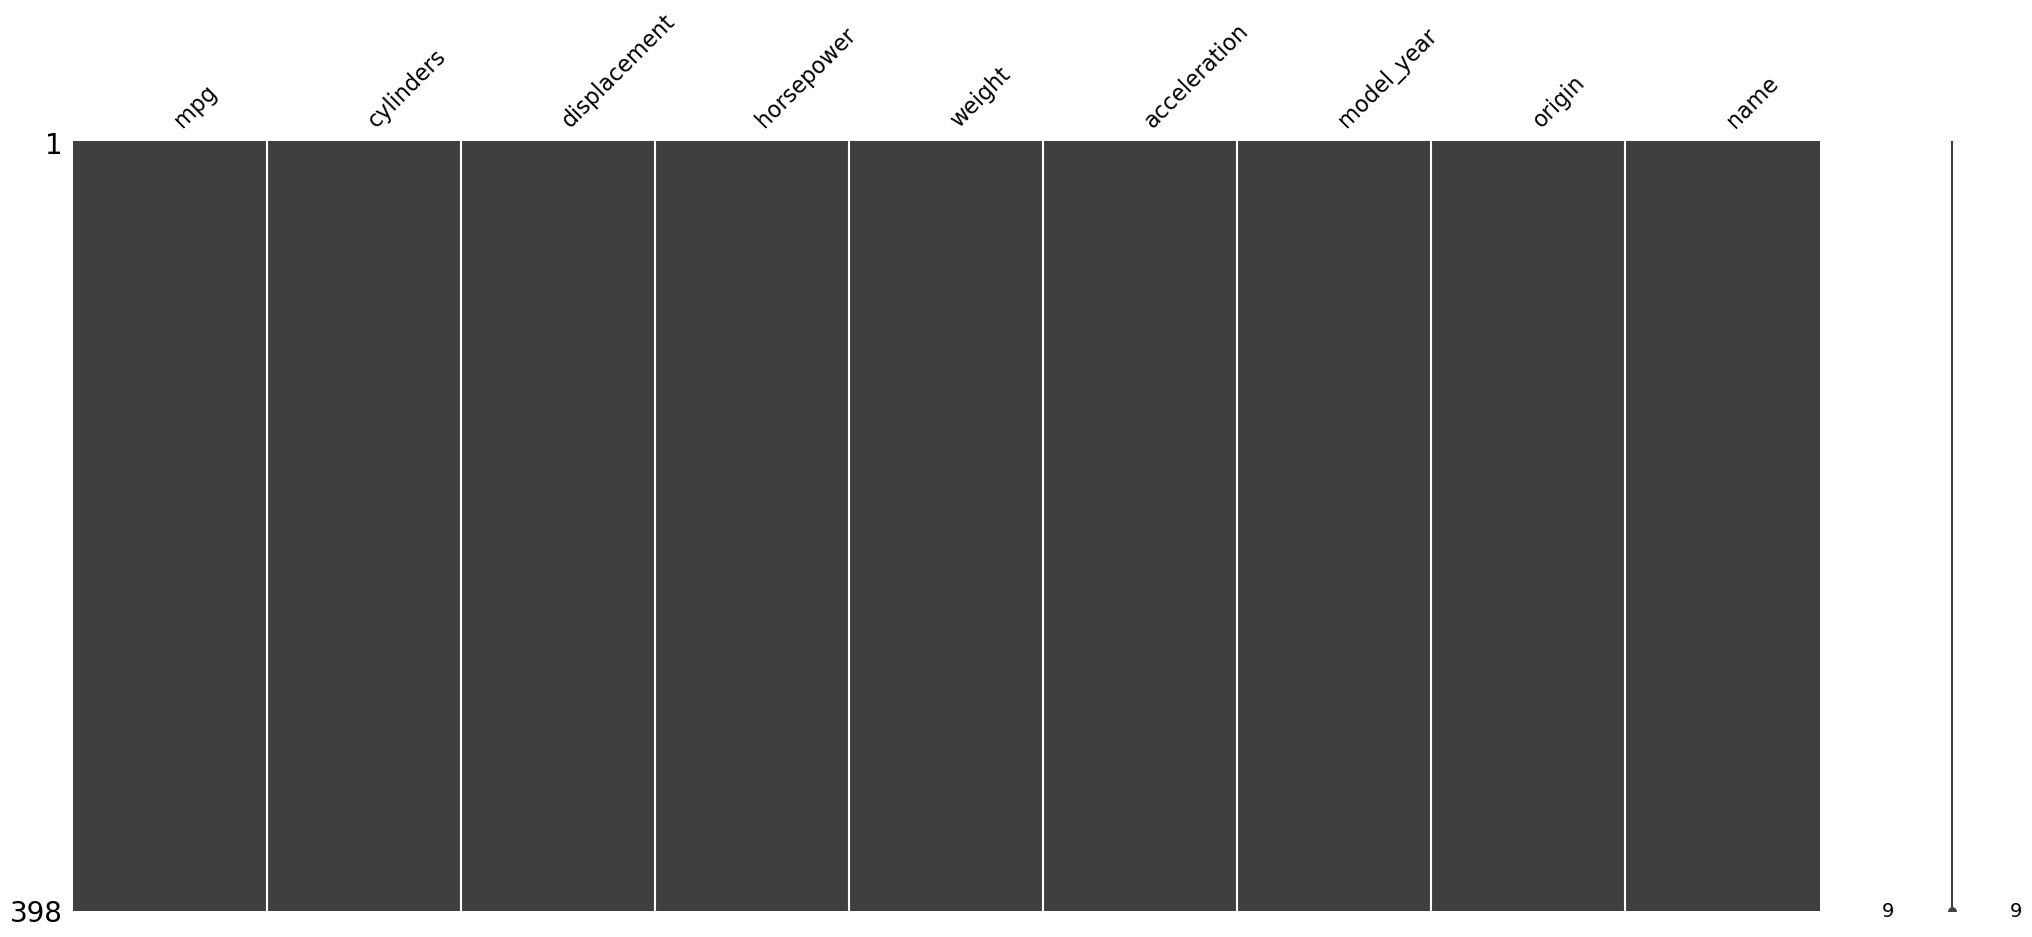

In [17]:
msno.matrix(mpg)

Extrahieren Sie nun die relevanten Features und das Target. Eventuell wieder mit der .loc- oder .iloc-Methode ?

In [18]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [22]:
X = mpg.iloc[:,:-2]
y = mpg.origin

Nachdem Sie die Features und das Target extrahiert haben, können Sie einen Train-/Test Split machen.

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Nun geht es an das Training des Modells. Wissen Sie noch welche Methode Sie für das Training verwenden müssen?

In [24]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=10)

classifier.fit(X_train,y_train)

classifier.score(X_test,y_test)

/Users/kaslibekir/ENTER/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/kaslibekir/ENTER/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/kaslibekir/ENTER/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/kaslibekir/ENTER/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/kaslibekir/ENTER/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecate

0.9125

Nun lassen wir uns noch eine Confusion-Matrix ausgeben um die Güte besser evaluieren zu können.

/Users/kaslibekir/ENTER/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/kaslibekir/ENTER/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/kaslibekir/ENTER/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/kaslibekir/ENTER/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/kaslibekir/ENTER/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecate

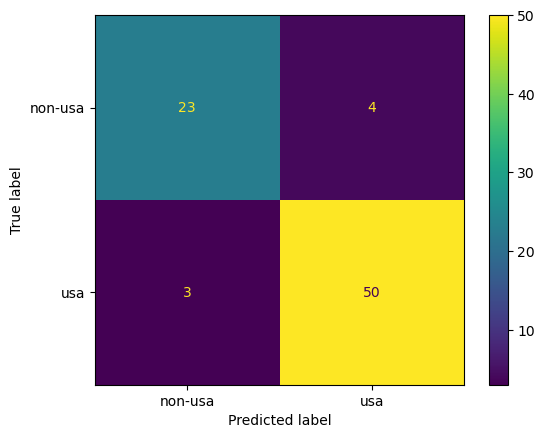

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)

Versuchen Sie nun Normalisierung auf die Daten anzuwenden mit einem StandardScaler.

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_attributes = mpg.iloc[:,:-3]

temp = scaler.fit_transform(numerical_attributes)
mpg.iloc[:,:-3] =  temp

/Users/kaslibekir/ENTER/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/kaslibekir/ENTER/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/kaslibekir/ENTER/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/kaslibekir/ENTER/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/kaslibekir/ENTER/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecate

In [28]:
X = mpg.iloc[:,:-2]
y = mpg.origin

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [30]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=10)

classifier.fit(X_train,y_train)

classifier.score(X_test,y_test)

/Users/kaslibekir/ENTER/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/kaslibekir/ENTER/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/kaslibekir/ENTER/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/kaslibekir/ENTER/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/kaslibekir/ENTER/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecate

0.9125

Führen Sie die letzte Zeile eventuell mit verschiedenen max_depth Parametern durch und vergleichen Sie die Güte.

Vergleichen wir dieses Modell nun mit einem simplen K-Nearest-Neighbor Classifier mit einem k=3. Wichtig ist, dass bei einem KNN-Classifier kein wirkliches Modell trainiert wird, sondern neue Datenpunkte anhand der vorhandenen Trainingsdaten vorhergesagt werden. Deswegen nennt man dieses Verfahren auch 'Lazy Learner'.

In [31]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3) # n_neighbors = k

classifier.fit(X_train,y_train) 

classifier.score(X_test,y_test)

/Users/kaslibekir/ENTER/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/kaslibekir/ENTER/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/kaslibekir/ENTER/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/kaslibekir/ENTER/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/kaslibekir/ENTER/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecate

0.7875